In [1]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from torchvision.datasets import MNIST

In [3]:
import transformers

# 1. 数据集准备

手写数字识别的经典数据集是MNIST，它包含了28x28像素的手写数字图像。我们将使用Python的tensorflow库来加载和预览MNIST数据集。

https://blog.csdn.net/oandy0/article/details/137654041?ops_request_misc=&request_id=&biz_id=102&utm_term=%E6%89%8B%E5%86%99%E6%95%B0%E5%AD%97%E8%AF%86%E5%88%ABpython&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-1-137654041.142^v100^pc_search_result_base9&spm=1018.2226.3001.4187

In [17]:
import cv2

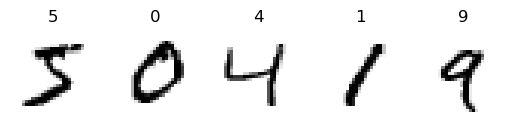

In [8]:
import tensorflow as tf
import matplotlib.pylab as plt
# 加载MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 显示一些训练数据
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.title(y_train[i])
plt.show()


# 2. 数据预处理

在训练神经网络之前，我们需要对数据进行预处理，包括归一化、划分训练集和测试集等。

In [10]:
# 数据归一化
x_train, x_test = x_train / 255.0, x_test / 255.0
# 划分训练集和测试集
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# 转换为4维张量
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# 3. 构建神经网络

我们将构建一个简单的神经网络，它包括一个输入层、两个隐藏层和一个输出层。每个隐藏层都使用ReLU激活函数，输出层使用softmax激活函数。

In [11]:
# 构建神经网络
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# 编译模型
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 训练模型
model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8802 - loss: 0.3935 - val_accuracy: 0.9763 - val_loss: 0.0746
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9839 - loss: 0.0536 - val_accuracy: 0.9827 - val_loss: 0.0570
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9887 - loss: 0.0368 - val_accuracy: 0.9857 - val_loss: 0.0460
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9922 - loss: 0.0270 - val_accuracy: 0.9808 - val_loss: 0.0683
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.9902 - val_loss: 0.0356


5. 评估模型
训练完成后，我们将使用测试数据来评估模型的性能。

In [14]:
# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


313/313 - 1s - 2ms/step - accuracy: 0.9909 - loss: 0.0292
Test accuracy: 0.9908999800682068


6. 预测
最后，我们可以使用模型来预测新的手写数字图像。

https://blog.csdn.net/weixin_43718786/article/details/115252637?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522172422771916800188515887%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=172422771916800188515887&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-2-115252637-null-null.142^v100^pc_search_result_base9&utm_term=%E6%89%8B%E5%86%99%E6%95%B0%E5%AD%97%E8%AF%86%E5%88%ABpython&spm=1018.2226.3001.4187

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

In [21]:
n_epochs = 5 # 模型训练5轮
log_interval = 30 #控制打印频率的，设n = 30*batch_size，即n张图后打印一次进度
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 根据设备是否支持GPU来选择硬件 
size = 32 # 对输入图片进行处理，拉伸为32*32的图片，这是为了复刻手写数字识别的神经网络，其输入为32*32的灰度图像
learn_rate = 0.03 # 学习率
momentum = 0.1  # 动量


In [22]:
from torchvision.datasets import MNIST


transform = transforms.Compose(
    [ transforms.Resize(size), transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))]) # 正则化处理，相当于z-score

trainset = MNIST(root = './', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = MNIST(root = './', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True, num_workers=2)


AttributeError: module 'torchvision.transforms' has no attribute 'Resize'